## Time Series EDA 

<b>Topics to be covered</b>

 - Pandas with Data Reader --> Financial Data
 - Date Time Index
 - Time Resampling
 - Time Shifts
 - Mean Rolling and Expanding
 - Time Series Visualizations
 - One Sample Project on Time Series

In [2]:
# Install Pandas datareader library

!pip install pandas-datareader

In [5]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [7]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [8]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015
2022-03-03,886.440002,832.599976,878.770020,839.289978,20373300.0,839.289978
2022-03-03,886.439026,832.600098,878.770020,839.289978,20541169.0,839.289978


<AxesSubplot:xlabel='Date'>

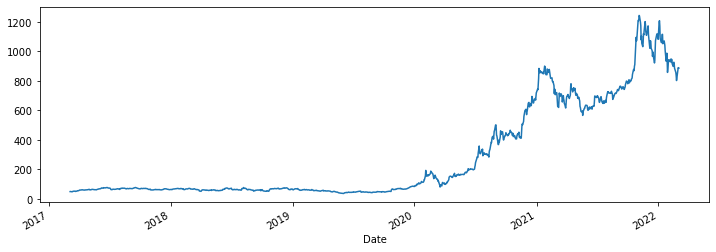

In [11]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

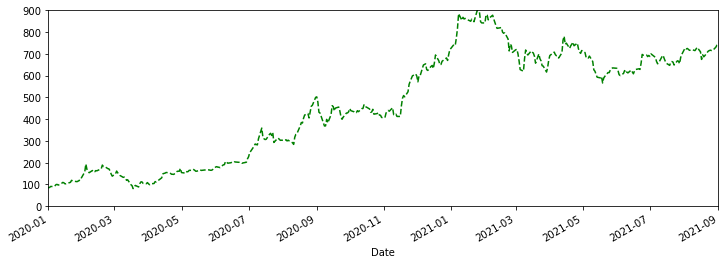

In [18]:
# x limit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900], figsize=(12,4),ls='--', c='green')

In [19]:
df_tesla.index

DatetimeIndex(['2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17',
               ...
               '2022-02-18', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-03'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [22]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [23]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

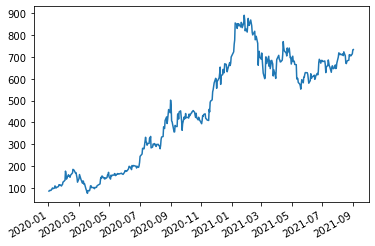

In [29]:
figure,axis = plt.subplots()
# plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [30]:
# Datetime index

In [31]:
df_tesla = df_tesla.reset_index()

In [32]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [34]:
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
1,2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2,2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
3,2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
4,2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [37]:
# To set date as index

df_tesla.set_index(keys='Date',drop=True,inplace=True)

In [38]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [39]:
# datetime

from datetime import datetime

In [40]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [41]:
datetime.now()

datetime.datetime(2022, 3, 4, 18, 11, 5, 493576)

In [42]:
def add_num(num1,num2):
    return num1+num2

In [44]:
start_time = datetime.now()
num1=20
num2=30
add_num(num1,num2)
end_time = datetime.now()
print(end_time-start_time)

0:00:00


In [45]:
date = datetime(2021,11,21)

In [46]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [47]:
date.date()

datetime.date(2021, 11, 21)

In [49]:
date.day

21

In [51]:
date.weekday()

6

In [52]:
date.year

2021

In [53]:
date.month

11

In [54]:
date.hour

0

In [56]:
date.minute

0

## Time Resampling 

In [58]:
# year end frequency

df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.556000,48.964001,48.737999,15113000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [59]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

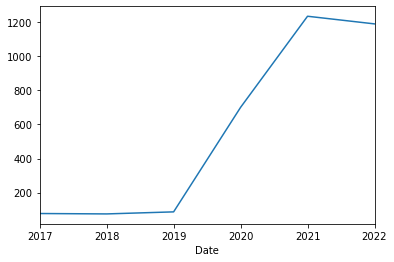

In [60]:
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

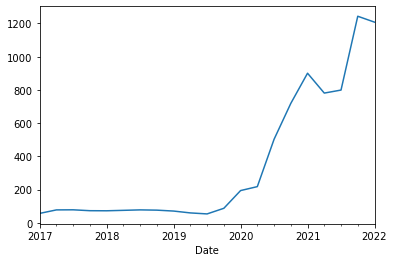

In [61]:
# Quarterly start frequency

df_tesla.resample(rule='QS').max()['High'].plot()

In [63]:
# Business End frequency

df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [64]:
# Business Quarter Start frequency

df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,39938000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


<AxesSubplot:xlabel='Date'>

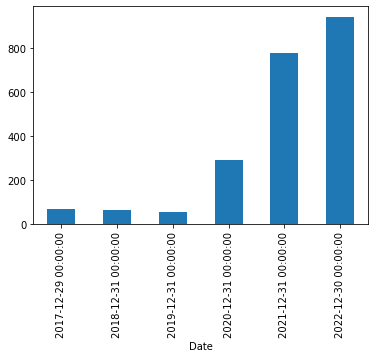

In [67]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

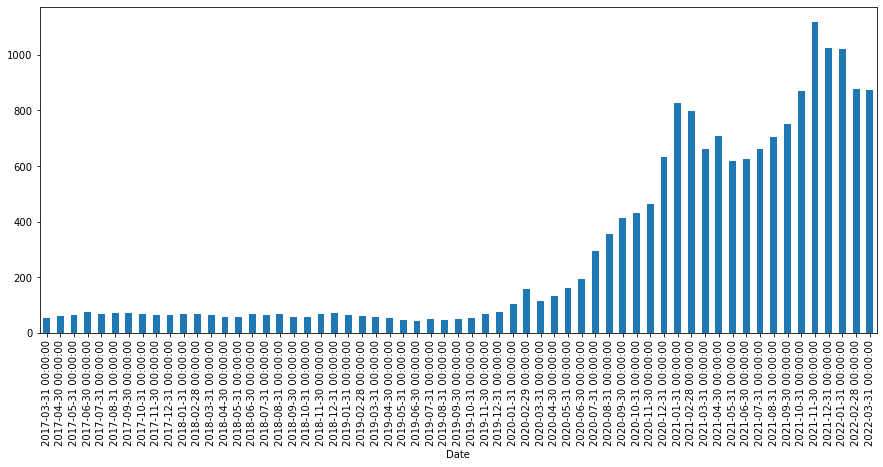

In [70]:
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(15,6))

In [71]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999


In [73]:
df_tesla['High'].rolling(3).mean()

Date
2017-03-06           NaN
2017-03-07           NaN
2017-03-08     50.377333
2017-03-09     50.174666
2017-03-10     49.681999
                 ...    
2022-02-28    832.946655
2022-03-01    862.079997
2022-03-02    884.406657
2022-03-03    887.599996
2022-03-03    886.453003
Name: High, Length: 1260, dtype: float64

In [74]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(20).mean()

In [77]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN


<AxesSubplot:xlabel='Date'>

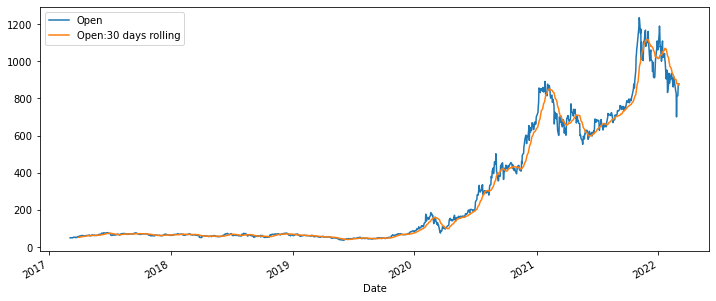

In [78]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

<b> Assignment </b>
 - Read the MSFT data using Pandas Data Reader
 - Get the maximum price of the share from 2017 to 2022
 - Which is the date of the highest price of the stock?
 - Which is the date of the lowest price of the stock?

In [81]:
# Read the MSFT data using Pandas Data Reader

df_msft = pdr.get_data_yahoo('MSFT')
df_msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,64.559998,63.810001,63.970001,64.269997,18750300.0,59.995068
2017-03-07,64.779999,64.190002,64.190002,64.400002,18521000.0,60.116421
2017-03-08,65.080002,64.250000,64.260002,64.989998,21510900.0,60.667179
2017-03-09,65.199997,64.480003,65.190002,64.730003,19846800.0,60.424469
2017-03-10,65.260002,64.750000,65.110001,64.930000,19538200.0,60.611168


In [97]:
# Get the maximum price of the share from 2017 to 2022

df_msft.resample(rule="A").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,87.500000,86.230003,87.120003,86.849998,71066700.0,82.383957
2018-12-31,116.180000,114.930000,115.419998,115.610001,111242100.0,111.083588
2019-12-31,159.550003,158.220001,159.449997,158.960007,55636400.0,155.664322
2020-12-31,232.860001,227.350006,229.270004,231.649994,97012700.0,228.651733
2021-12-31,349.670013,342.200012,344.619995,343.109985,69870600.0,342.402008
2022-12-31,338.000000,329.779999,335.350006,334.750000,90428900.0,334.059265


In [98]:
# Which is the date of the highest price of the stock?

df_msft['High'].resample(rule="BA").max()

Date
2017-12-29     87.500000
2018-12-31    116.180000
2019-12-31    159.550003
2020-12-31    232.860001
2021-12-31    349.670013
2022-12-30    338.000000
Freq: BA-DEC, Name: High, dtype: float64

In [100]:
# Which is the date of the lowest price of the stock?

df_msft['Low'].resample(rule="BA").min()

Date
2017-12-29     63.810001
2018-12-31     83.830002
2019-12-31     97.199997
2020-12-31    132.520004
2021-12-31    211.940002
2022-12-30    271.519989
Freq: BA-DEC, Name: Low, dtype: float64